# Creating and accessing a fit
This example shows you, how you can easily calculate and visualize a fit to your data

In [1]:
import numpy as np
import xarray as xr
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False

First we start with some example data to make a linear regression from the equation
``y(x) = 4 * x + 30``

In [2]:
x = np.linspace(0, 100)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 50)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 0.0 2.041 4.082 6.122 ... 95.92 97.96 100.0
    y        (experiment) float64 44.05 116.6 -21.61 13.46 ... 440.1 426.2 387.1

We can show this input data using the ``lineplot`` plot method from the psy-simple plugin:

/home/circleci/miniconda3/envs/docs/lib/python3.8/site-packages/psy_simple/plugin.py:448: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  return {'loc': validate_legend_loc(value)}


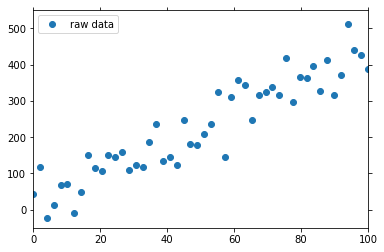

In [3]:
raw = psy.plot.lineplot(
    ds, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data', 
    legend='upper left')

The visualization of the fit is straight forward using the ``linreg`` plot method:

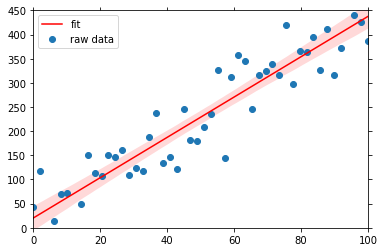

In [4]:
fit = psy.plot.linreg(ds, ax=raw.plotters[0].ax, name='y', coord='x', 
                      legendlabels='fit', color='red')
fit.share(raw[0], keys='legend')
fit.show()

The shaded red area displays the 95% confidence interval. To access the data for the fit, just use the ``plot_data`` attribute:

In [5]:
data = fit[0].psy.plotter.plot_data
data[0]

<xarray.DataArray 'y' (variable: 3, x: 100)>
array([[ 20.33062631,  24.54636686,  28.76210741,  32.97784796,
         37.19358851,  41.40932906,  45.62506961,  49.84081016,
         54.05655071,  58.27229126,  62.48803181,  66.70377236,
         70.91951291,  75.13525346,  79.35099401,  83.56673456,
         87.78247511,  91.99821566,  96.21395621, 100.42969676,
        104.64543731, 108.86117786, 113.07691841, 117.29265896,
        121.50839951, 125.72414006, 129.93988061, 134.15562116,
        138.37136171, 142.58710226, 146.80284281, 151.01858336,
        155.23432391, 159.45006446, 163.66580501, 167.88154556,
        172.09728611, 176.31302666, 180.52876721, 184.74450776,
        188.96024831, 193.17598886, 197.39172941, 201.60746996,
        205.82321051, 210.03895106, 214.25469161, 218.47043216,
        222.68617271, 226.90191326, 231.11765381, 235.33339436,
        239.54913491, 243.76487546, 247.98061601, 252.19635656,
        256.41209711, 260.62783766, 264.84357821, 269.05931876,
        273.27505931, 277.49079986, 281.70654041, 285.92228096,
        290.13802151, 294.35376206, 298.56950261, 302.78524316,
        307.00098371, 311.21672426, 315.43246481, 319.64820536,
        323.86394591, 328.07968646, 332.29542701, 336.51116756,
        340.72690811, 344.94264866, 349.15838921, 353.37412976,
...
        122.09919334, 126.22147158, 130.23730771, 134.08590618,
        138.16439985, 142.23770413, 146.12624467, 150.31109547,
        154.46126496, 158.39549057, 162.50865969, 166.62399046,
        170.627687  , 174.71528709, 178.64756191, 182.66260632,
        186.67560184, 190.6870244 , 194.70484168, 198.71319738,
        202.79057064, 206.73826108, 210.82801178, 215.05891778,
        219.53257236, 223.55129337, 227.67530913, 231.86431564,
        235.95878344, 240.1201984 , 244.35758225, 248.65884628,
        252.76802171, 257.05220813, 261.48543227, 265.86770348,
        269.99202623, 274.47534266, 278.77730492, 283.04879554,
        287.39758688, 291.92154715, 296.37518457, 300.91259445,
        305.25594816, 309.77850104, 314.23847335, 318.56589388,
        322.89448632, 327.41192627, 332.05730812, 336.67756074,
        341.17811504, 345.65364795, 350.01512554, 354.3473276 ,
        359.04584628, 363.48804419, 367.97587234, 372.68778826,
        377.18903449, 381.69226453, 386.19937139, 390.70647826,
        395.37752306, 400.30565245, 404.81301707, 409.03305763,
        413.571862  , 418.20238594, 422.83290988, 427.36780876,
        431.88166901, 436.74725241, 441.18507163, 445.850295  ,
        450.66246152, 455.30627718, 459.95009284, 464.59390851]])
Coordinates:
  * x         (x) float64 0.0 1.01 2.02 3.03 4.04 ... 96.97 97.98 98.99 100.0
  * variable  (variable) <U7 'y' 'min_err' 'max_err'
Attributes:
    slope:      4.173583144439824
    intercept:  20.330626309836603
    rsquared:   0.8642095929606968

You see, that there are new attributes, ``rsquared``, ``intercept`` and ``slope``, the characteristics of the fit.
As always with the dataset attributes in ``psyplot``, you can visualize them, for example in the legend:

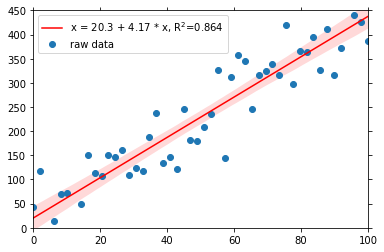

In [6]:
fit.update(legendlabels='%(yname)s = %(intercept).3g + %(slope).3g * %(xname)s, R$^2$=%(rsquared).3g')
fit.show()

To improve the fit, we can also force the line to go through a given fix point. For example here, we know, that the
fit crosses the y-line at 30:

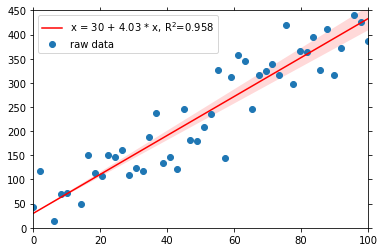

In [7]:
fit.update(fix=30)
fit.show()

That works for any other point as well. E.g. we also know, that the line goes through ``y = 4 * 10 + 30 = 70``:

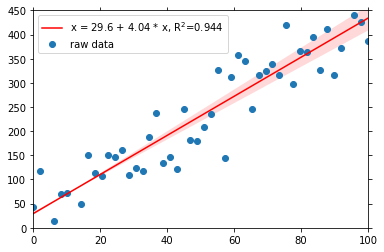

In [8]:
fit.update(fix=[(10, 70)])
fit.show()

For more informations, look into the formatoptions of the ``regression`` group

In [9]:
fit.summaries('regression')

xrange
    Specify the range for the fit to use for the x-dimension
yrange
    Specify the range for the fit to use for the y-dimension
line_xlim
    Specify how wide the range for the plot should be
p0
    Initial parameters for the :func:`scipy.optimize.curve_fit` function
fit
    Choose the linear fitting method
fix
    Force the fit to go through a given point
nboot
    Set the number of bootstrap resamples for the confidence interval
ci
    Draw a confidence interval
ideal
    Draw an ideal line of the fit


In [10]:
psy.close('all')